# Movie Classifier

*The main focus of this notebook is to develop machine learning models that can accurately classify the ***"categories"*** of movies or series. These models rely on a set of features that have proven to be valuable during the preprocessing stage. The project involves several significant phases, namely ***data analysis***, ***preprocessing***, ***model training***, ***optimization***, and ***prediction***. The training process will utilize ***decision tree*** and ***random forest*** algorithms as the primary methods.*

# *Importing Libraries*

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn

from sklearn.feature_selection import mutual_info_classif

# *Imprting Dataset*

Our analysis will be based on a dataset comprising Netflix and Amazon Series/Movies. The dataset includes various fields and attributes that provide relevant information for our task, such as:

+ ***Type:*** Referring to the category or genre of the series/movie.
+ ***Title:*** The name or title of the series/movie.
+ ***Cast:*** The actors or actresses involved in the production.
+ ***Country:*** The country or countries where the series/movie was produced.
+ ***Release Year:*** The year when the series/movie was released.
+ ***Listed In:*** The categorization or genres assigned to the series/movie.
+ ***Description:*** A brief description or summary of the series/movie.

Our primary objective is to predict the values associated with the "type" field, utilizing all the other attributes available in the dataset. This prediction will enable us to classify and categorize series/movies based on their attributes.

In [2]:
df = pd.read_csv('dataset.csv')
df

,type,title,cast,country,release_year,listed_in,description
0,Movie,Dick Johnson Is Dead,NaN,United States,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,1996,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


# *Exploratory Data Analysis (EDA)*

In [3]:
df.describe(include='all')

,type,title,cast,country,release_year,listed_in,description
count,11059,11059,9694,8364,11059.000000,11059,11059
unique,2,10957,9307,760,NaN,888,10978
top,Movie,"Sister, Sister",David Attenborough,United States,NaN,"Dramas, International Movies",1
freq,6131,2,20,3105,NaN,362,9
mean,NaN,NaN,NaN,NaN,2014.209603,NaN,NaN
std,NaN,NaN,NaN,NaN,8.959517,NaN,NaN
min,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11059 entries, 0 to 11058
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          11059 non-null  object
 1   title         11059 non-null  object
 2   cast          9694 non-null   object
 3   country       8364 non-null   object
 4   release_year  11059 non-null  int64 
 5   listed_in     11059 non-null  object
 6   description   11059 non-null  object
dtypes: int64(1), object(6)
memory usage: 604.9+ KB


## *Missing Values*

In [5]:
(df.isnull().sum(axis=0)/df.shape[0]) * 100

type             0.000000
title            0.000000
cast            12.342888
country         24.369292
release_year     0.000000
listed_in        0.000000
description      0.000000
dtype: float64

One critical aspect of data ***preprocessing*** in this project is addressing ***missing values*** present in the dataset. While numerous techniques are available, we will focus on two prominent approaches, each with its own advantages and disadvantages:

1. ***Deletion of Examples with Missing Values:***
   + ***Pros:***
     + *Avoids introducing implicit regularization or bias into the dataset.*
     + *Results in a more robust and internally consistent dataset.*
   + ***Cons:***
     + *Can lead to a significant loss of data, particularly if missing values are widespread.*
     + *Reduces the overall number of examples available for analysis.*

2. ***Replacement of Missing Values with Mean/Median:***
   + ***Pros:***
     + *Retains a substantial amount of data by replacing missing values with appropriate statistical measures.*
     + *Applicable to datasets of all sizes.*
   + ***Cons:***
     + *Imposes an implicit regularization effect on the dataset, potentially altering the distribution of the feature.*
     + *Only suitable for numerical data types.*

In this project, we have opted for the ***first approach***, as it aligns better with the specific types of missing data in the dataset. However, this decision does come at a cost, resulting in the loss of nearly 4000 examples due to the removal of instances with missing values.

Handling missing values is a crucial step to ensure the integrity and reliability of the dataset used for training and analysis. By carefully considering the advantages and disadvantages of different techniques, we can mitigate the impact of missing values on the subsequent stages of our project.

In [6]:
df = df.dropna()
df

,type,title,cast,country,release_year,listed_in,description
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,TV Show,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,"Comedies, Dramas",A woman adjusting to life after a loss contend...
...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,1996,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


## *Data Scaling: Normalization/Standardization*

In modern machine learning, two widely used techniques for data scaling are ***normalization*** and ***standardization***. The primary goal of these approaches is to transform the data to a more desirable range or distribution. Let's explore these techniques in more detail:

1. ***Normalization:*** This technique involves rescaling the data points to fit within a specific range, commonly between 0 and 1. The normalization process preserves the relative relationships between data points, ensuring that they maintain their proportionality after scaling.

2. ***Standardization:*** Unlike normalization, standardization aims to adjust the data to have a mean of 0 and a standard deviation of 1. By centering the data around zero and adjusting its spread, standardization makes the features more comparable and amenable to analysis.

Both normalization and standardization offer distinct advantages to the training process:

+ ***Increased Robustness:*** Scaling the data helps to reduce the impact of outliers and extreme values, making the models more resilient to noisy or skewed distributions.

+ ***Improved Training Speed:*** Scaling the features can accelerate the convergence of optimization algorithms during model training, resulting in faster and more efficient learning.

+ ***Mitigated Vanishing Gradient Problem:*** Rescaling the data mitigates the risk of vanishing gradients, a common issue in deep learning, which can hinder the learning process by slowing down or preventing weight updates.

In this project, we have chosen to use ***normalization*** to align with the encoding approach for categorical columns, specifically employing one-hot (1/0) encoding. By maintaining consistency in the data preprocessing steps, we ensure compatibility and coherence throughout the entire pipeline of our analysis.

In [7]:
sc = preprocessing.MinMaxScaler((0,1))
scaled_data = sc.fit_transform(df[['release_year']])

scaled_df = df.copy()
scaled_df['release_year'] = scaled_data
scaled_df

,type,title,cast,country,release_year,listed_in,description
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,1.000000,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,1.000000,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",0.645570,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,TV Show,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,1.000000,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,1.000000,"Comedies, Dramas",A woman adjusting to life after a loss contend...
...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,0.734177,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,0.683544,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,0.911392,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,0.936709,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


## *Data Encoding*

Two prevalent techniques for handling ***categorical data*** are ***label encoding*** and ***one-hot encoding***. Let's delve into these methods and their application in this project:

1. ***Label Encoding:*** This approach involves replacing each category with corresponding labels, typically represented by integers ranging from 0 to the total number of unique categories. Each category is assigned a unique numerical value, allowing the model to interpret and learn from the encoded data.

2. ***One-Hot Encoding:*** With one-hot encoding, separate binary fields are created for each category present in the dataset. In this encoding scheme, a value of 1 is assigned to the field corresponding to the matching category for a particular row, while all other fields are filled with 0s.

In our project, we have chosen to use ***one-hot encoding*** for the ***"type"*** and ***"country"*** fields. This decision aligns with the previous step where we applied a [0, 1] scaling to the numerical "release_year" field. It's important to note that for the ***"country"*** field, we split the list of countries by commas for each row before performing the one-hot encoding process.

By employing ***one-hot encoding***, we ensure consistency in the representation of categorical data and facilitate compatibility with the numerical features that have undergone scaling. This encoding scheme expands the dataset by adding additional fields, each representing a specific category, and enhances the model's ability to capture and learn from the categorical information present in the dataset.

In [8]:
def one_hot_ecndoing(df: pd.DataFrame, sep: str, rep: str):
    data_frame = df.copy()
    for i in data_frame.columns:
        if data_frame[i].dtype == 'O':
            tmp = data_frame[i].str.replace(rep, '').str.get_dummies(sep)
            data_frame = data_frame.drop(i, axis=1)
            data_frame = data_frame.join(tmp)
    return data_frame

In [9]:
temporary_dataframe = one_hot_ecndoing(df[['type', 'country']], sep=',', rep=' ')
onehot_encoding_dataframe = temporary_dataframe.join(scaled_df[['title', 'cast', 'release_year', 'description', 'listed_in']])
onehot_encoding_dataframe = onehot_encoding_dataframe.drop('TVShow', axis=1)
onehot_encoding_dataframe

,Movie,Afghanistan,Albania,Algeria,Angola,Argentina,Australia,Austria,Azerbaijan,Bahamas,...,VaticanCity,Venezuela,Vietnam,WestGermany,Zimbabwe,title,cast,release_year,description,listed_in
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",1.000000,"After crossing paths at a party, a Cape Town t...","International TV Shows, TV Dramas, TV Mysteries"
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",1.000000,In a city of coaching centers known to train I...,"International TV Shows, Romantic TV Shows, TV ..."
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",0.645570,"On a photo shoot in Ghana, an American model s...","Dramas, Independent Movies, International Movies"
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",1.000000,A talented batch of amateur bakers face off in...,"British TV Shows, Reality TV"
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",1.000000,A woman adjusting to life after a loss contend...,"Comedies, Dramas"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",0.734177,X-Men: Evolution features the team as teenager...,"Action-Adventure, Animation, Kids"
11055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",0.683544,A genius tries to fit in as a high school soph...,"Comedy, Coming of Age, Kids"
11056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",0.911392,Welcome to Kirby's world! It's rude and sketchy.,"Action-Adventure, Comedy, Coming of Age"
11057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",0.936709,Ryan discovers his ability to control a giant ...,"Action-Adventure, Comedy, Science Fiction"


There are various approaches to handling the ***"listed_in"*** column. In this context, we can adopt a similar strategy to what we used for the list of countries in each row. The recommended approach is to separate the category names in the ***"listed_in"*** column using commas and then perform a form of ***"one-hot" encoding***.

It's important to note that when we mention ***"one-hot" encoding*** in this context, we are referring to selecting the applicable items rather than adhering strictly to the convention of having only ***one "hot" label*** per field in each row. The goal is to capture the presence or absence of specific categories by assigning binary values accordingly.

By applying this approach, we can effectively represent the categories in the ***"listed_in"*** column and incorporate them into the dataset for further analysis and modeling.

In [10]:
temporary_dataframe = one_hot_ecndoing(onehot_encoding_dataframe[['listed_in']], sep=',', rep='and')
onehot_encoding_dataframe = temporary_dataframe.join(onehot_encoding_dataframe.drop('listed_in', axis=1))
onehot_encoding_dataframe

,Culture,Animals & Nature,Animation,Anime,Anime Features,Anthology,Buddy,Children & Family Movies,Classic & Cult TV,Classic Movies,...,Uruguay,VaticanCity,Venezuela,Vietnam,WestGermany,Zimbabwe,title,cast,release_year,description
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",1.000000,"After crossing paths at a party, a Cape Town t..."
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",1.000000,In a city of coaching centers known to train I...
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",0.645570,"On a photo shoot in Ghana, an American model s..."
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",1.000000,A talented batch of amateur bakers face off in...
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",1.000000,A woman adjusting to life after a loss contend...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",0.734177,X-Men: Evolution features the team as teenager...
11055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",0.683544,A genius tries to fit in as a high school soph...
11056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",0.911392,Welcome to Kirby's world! It's rude and sketchy.
11057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",0.936709,Ryan discovers his ability to control a giant ...


## *Utilizing Count Vectorization on Textual Fields*

***Count Vectorization*** is essentially the utilization of the ***"bag of words"*** model on a given dataset. It involves tallying the frequency of each word in every sentence and assigning it to the respective field for future use. In the subsequent code block, we employ the ***CountVectorizer*** class from ***Sklearn*** to implement this technique. It is important to note that we utilize the ***min_df*** and ***max_df*** arguments to restrict the dimensionality of the dataset by setting lower values, ensuring more efficient processing and analysis.

In [ ]:
data_series = onehot_encoding_dataframe['description'] + ' ' + onehot_encoding_dataframe['title'] + ' ' + onehot_encoding_dataframe['cast']

In [17]:
vectorizer = CountVectorizer(analyzer='word', min_df=0.02, max_df=0.6)
transformed_data = vectorizer.fit_transform(data_series)
columns_series = 'desc_' + pd.Series(vectorizer.get_feature_names())

c:\Users\amirhosein\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
preprocessed_dataframe = onehot_encoding_dataframe.join(pd.DataFrame(transformed.toarray(), onehot_encoding_dataframe.index, columns=columns_series))
preprocessed_dataframe = preprocessed_dataframe.drop(['description', 'title', 'cast'], axis=1)
preprocessed_dataframe

,Culture,Animals & Nature,Animation,Anime,Anime Features,Anthology,Buddy,Children & Family Movies,Classic & Cult TV,Classic Movies,...,desc_while,desc_who,desc_wife,desc_will,desc_with,desc_woman,desc_world,desc_year,desc_years,desc_young
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Increasing the number of ***features*** in a ***Decision Tree*** model can enhance its performance up to a certain extent. However, if the number of features is allowed to increase without bounds, it can lead to ***overfitting***, where the model becomes excessively sensitive to the noise present in the training set. In order to mitigate this issue, it is important to set appropriate thresholds for ***feature selection***. In this case, the maximal and minimal repeat rates for the selected features have been set to ***2%*** and ***60%*** respectively. By setting these limits, we aim to strike a balance between capturing important information and avoiding overfitting caused by noisy data.

## *Exploring Feature Relationships: Uncovering Connections and Dependencies*

+ ***Evaluating Information Gain:*** Analyzing Feature Selection for Decision Trees and Enhancing Result Verification

In order to determine the most informative features for our Decision Tree model, we calculate and visualize the information gain associated with each attribute. This plot provides valuable insights into the selection process of attributes, allowing us to make informed decisions and validate the outcomes of our model. By assessing the information gain, we can effectively prioritize and choose the most influential features, contributing to the accuracy and reliability of our Decision Tree model.

In [20]:
info = mutual_info_classif(preprocessed_dataframe.drop('Movie', axis=1), preprocessed_dataframe['Movie'], discrete_features=False)

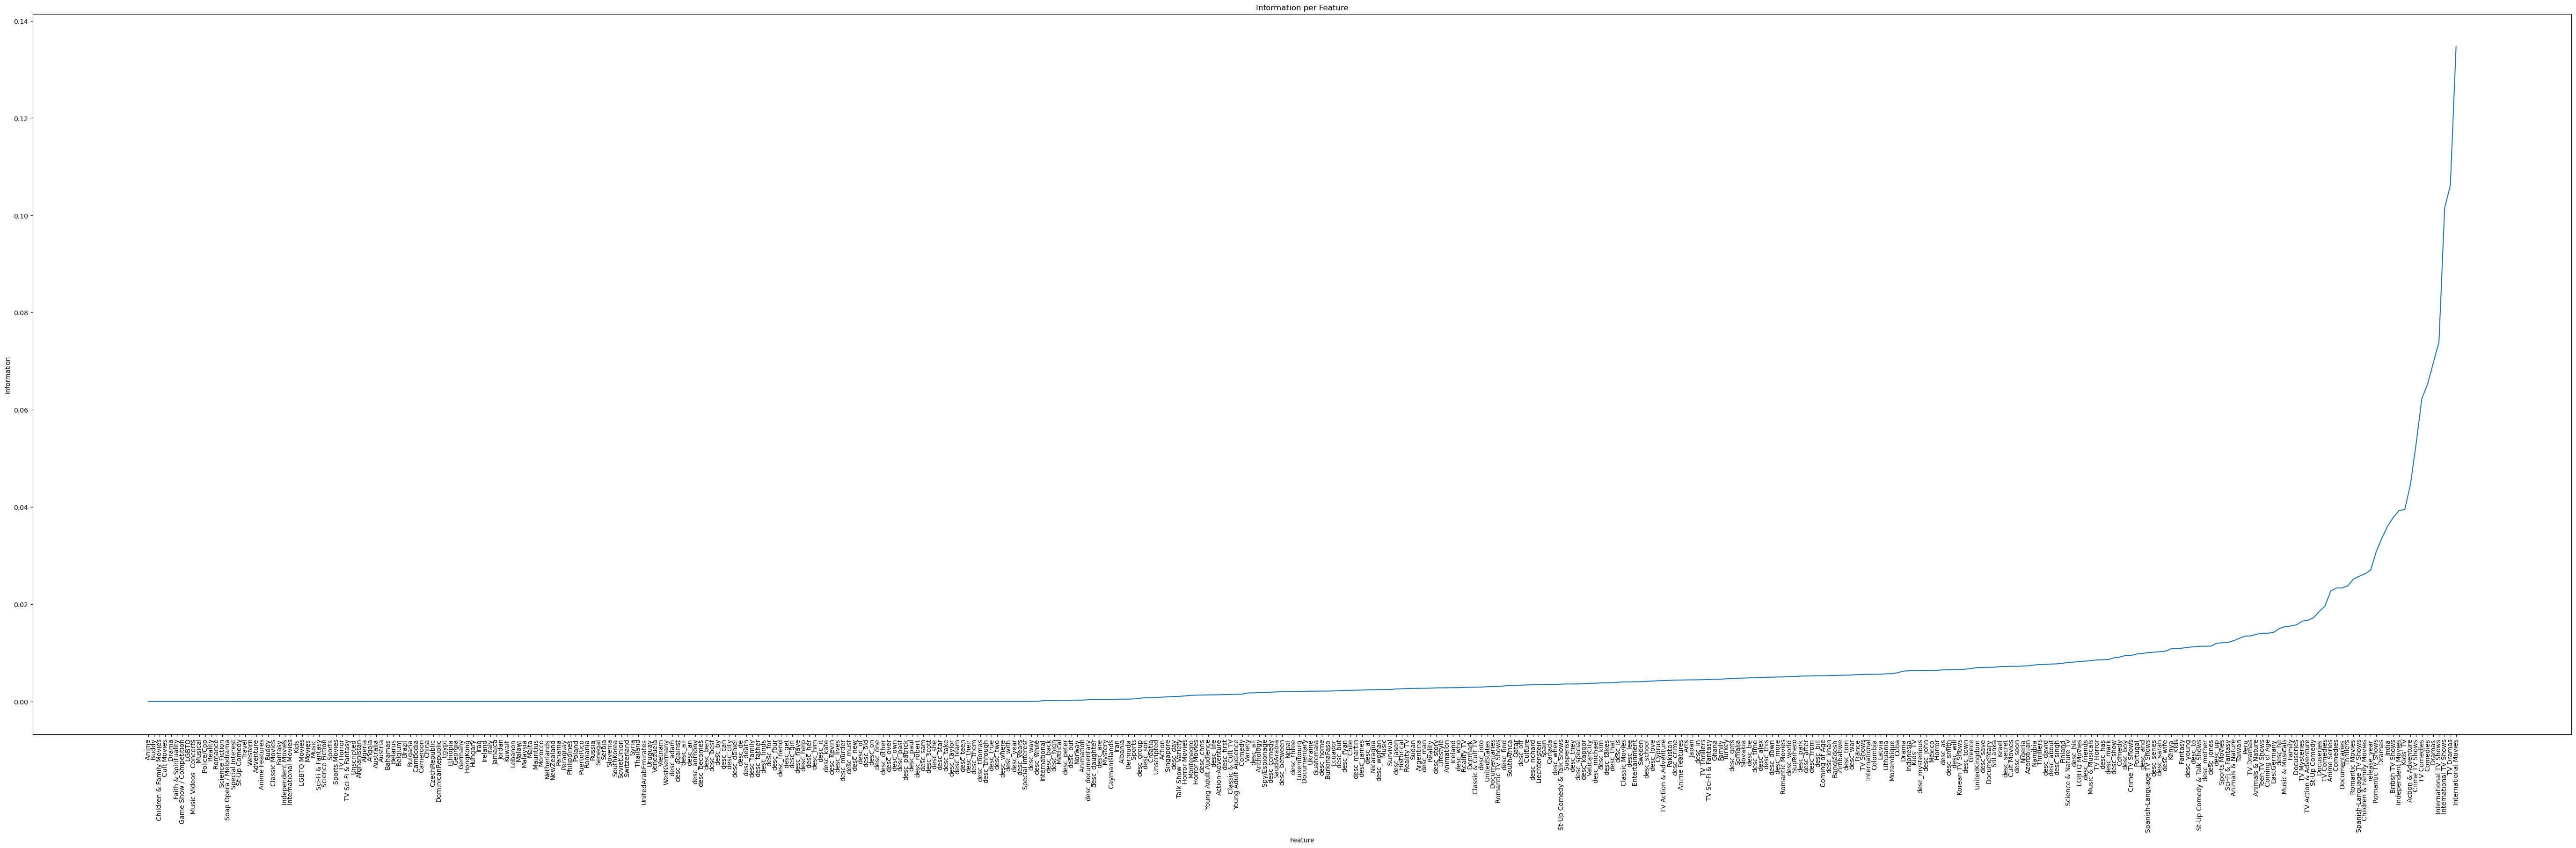

In [21]:
zipped_file = zip(preprocessed_dataframe.drop('Movie', axis=1).columns, info)
info_to_dictionary = dict(zipped_file)
info_to_dictionary = sorted(info_to_dictionary.items(), key=lambda i: i[1])

# Plot
plt.figure(figsize=(70, 20))
plt.xticks(rotation=90)
plt.plot(dict(info_to_dictionary).keys(), dict(info_to_dictionary).values())
plt.xlabel('Feature')
plt.ylabel('Information')
plt.title('Information per Feature')
plt.show()